# Decision Tree Classifier

Indepth explanationcan be found [here](https://towardsai.net/p/programming/decision-trees-explained-with-a-practical-example-fe47872d3b53)

### Working of Decision Tree

1) The root node feature is selected based on the results from the Attribute Selection Measure(ASM).

2) The ASM is repeated until a leaf node, or a terminal node cannot be split into sub-nodes.

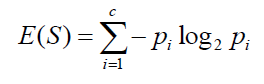

Attribute Subset Selection Measure is a technique used in the data mining process for data reduction. The data reduction is necessary to make better analysis and prediction of the target variable.

### The two main ASM techniques are

## 1) Gini index

The measure of the degree of probability of a particular variable being wrongly classified when it is randomly chosen is called the Gini index or Gini impurity. The data is equally distributed based on the Gini index.

Mathematical Formula :

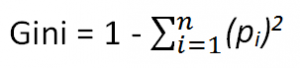

Pi= probability of an object being classified into a particular class.

When you use the Gini index as the criterion for the algorithm to select the feature for the root node.,The feature with the least Gini index is selected.

## 2) Information Gain(ID3)

Entropy is the main concept of this algorithm, which helps determine a feature or attribute that gives maximum information about a class is called Information gain or ID3 algorithm. By using this method, we can reduce the level of entropy from the root node to the leaf node.

Mathematical Formula :

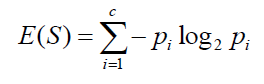

‘p’, denotes the probability of E(S), which denotes the entropy. The feature or attribute with the highest ID3 gain is used as the root for the splitting.

## Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

## Loading Data

In [2]:
data = pd.read_csv(r"Decision Tree\study_data.csv")

**A little bit of data exploration**

In [3]:
data.head(10)

,repetition_time,study_time,knowledge_level
0,0.00,0.00,Low
1,0.24,0.90,High
2,0.25,0.33,Low
3,0.65,0.30,High
4,0.98,0.24,Low
5,0.10,0.66,High
6,0.29,0.56,High
7,0.40,0.01,Low
8,0.72,0.25,Low
9,0.20,0.85,High


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   repetition_time  258 non-null    float64
 1   study_time       258 non-null    float64
 2   knowledge_level  258 non-null    object 
dtypes: float64(2), object(1)
memory usage: 5.1+ KB


#### Counting unique values

In [5]:
data['knowledge_level'].unique()

array(['Low', 'High'], dtype=object)

In [6]:
data['knowledge_level'].value_counts()

High    151
Low     107
Name: knowledge_level, dtype: int64

#### Splitting data

In [7]:
# training dataset and labels
x = data.drop(data.columns[[2]], axis = 1)
y = data['knowledge_level']

In [8]:
x.head()

,repetition_time,study_time
0,0.00,0.00
1,0.24,0.90
2,0.25,0.33
3,0.65,0.30
4,0.98,0.24


In [9]:
y.head()

0     Low
1    High
2     Low
3    High
4     Low
Name: knowledge_level, dtype: object

In [10]:
y = pd.get_dummies(data, columns=['knowledge_level'])

In [11]:
y.head()

,repetition_time,study_time,knowledge_level_High,knowledge_level_Low
0,0.00,0.00,0,1
1,0.24,0.90,1,0
2,0.25,0.33,0,1
3,0.65,0.30,1,0
4,0.98,0.24,0,1


In [13]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y['knowledge_level_High'], test_size = 0.30, random_state =0)

## Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

# <font color = "green">Decision Tree</font>

### Training model

In [15]:
# using sklearn library
# fitting the Decision Tree CLassifier Model

from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state = 0,criterion = "entropy")
dt_classifier.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Predicting Test_input

In [16]:
y_pred = dt_classifier.predict(xtest)

### Results

In [17]:
# Building confusion MAtrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)

In [18]:
cm

array([[36,  0],
       [ 0, 42]], dtype=int64)

In [19]:
# finding accuracy

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_pred)

1.0

It is given 100% accurate or 1.0 because we have less data.

# Visualising the model performance

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


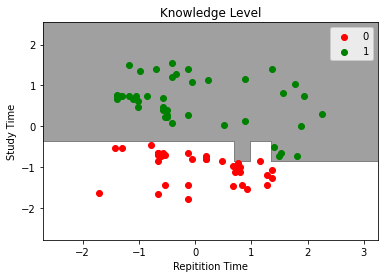

In [20]:

from matplotlib.colors import ListedColormap
X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, dt_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('white', 'grey')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Knowledge Level')
plt.xlabel('Repitition Time')
plt.ylabel('Study Time')
plt.legend()
plt.show()